<a href="https://colab.research.google.com/github/jgmzur29/PetroSpeechAnalisys/blob/main/Speechanalisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COLOMBIA'S PRESIDENTIAL SPEECH VISUAL ANALISYS WITH PYTHON

# introduction

In this project i'm using some web scrapping tools for pyhton to have a simply but powerful analysis of the speech of the new president of Colombia, Gustavo Petro. <br>
After retrieving the info, i used word_cloud to convert the data into a WordCloud image in order to focus on the words used on it. Also did a count on the 10 top words using Matplotlib. <br>
The idea of this project is add in a near future a second speech so we can compare the most used words and the main ideas of it. <br>
This is a superficial analisys, the main idea is to prove the utility of python in this kind of topics. 


In [17]:
#import requests for web Scrapping
import pandas as pd
import numpy as np
import requests as rq
import io
import collections

In [18]:
#import matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
#import k-means from clustering stage
from PIL import Image
from matplotlib import rcParams

In [20]:
texto = open('/content/discursoPresidencial.txt', 'r', encoding='latin-1')
mensaje = texto.read()




# What are the Word Clouds ?

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is. For this task, we will be using the python library called 'word_cloud'.

In [21]:
#library for Wordcloud
!pip -q install wordcloud

In [22]:
!pip -q install stop-words

In [23]:
import stop_words
#This is to add the words that we want to ignore
from stop_words import get_stop_words
#we clarify that we need the spanish stopwords
stop_words_es = get_stop_words('es')

In [24]:
from wordcloud import WordCloud, STOPWORDS
print('WordCloud is installed') #just to check

WordCloud is installed


In [65]:
stop_words = ["Todas", "todas", "Colombia.", "año", "hoy", "debe", "para", "por", "el", "en", "si", "aqui", "dice", "solo", "Es", "El", "No", "la", "La", "no", "que", "Que", "Los", "los"] + stop_words_es
#initiate wordCloud object
speachPetro = WordCloud (
    background_color='white',
    max_words=2000,
    stopwords=stop_words
)

#generate the wordCloud
speachPetro.generate(mensaje)

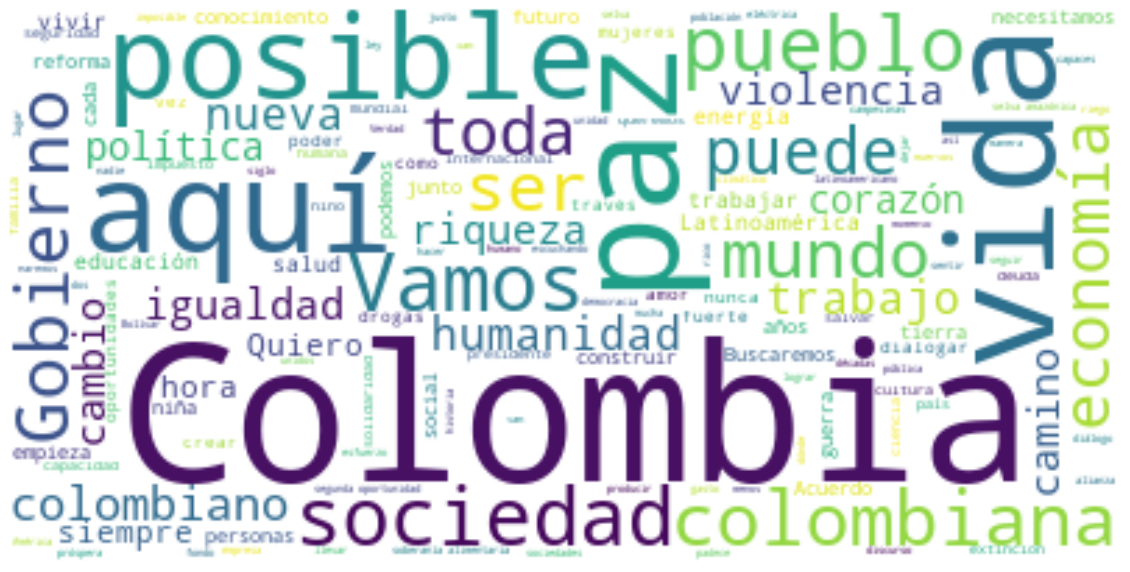

In [58]:
#display the wordCLoud
plt.imshow(speachPetro, interpolation='bilinear')
plt.axis('off')
plt.show()

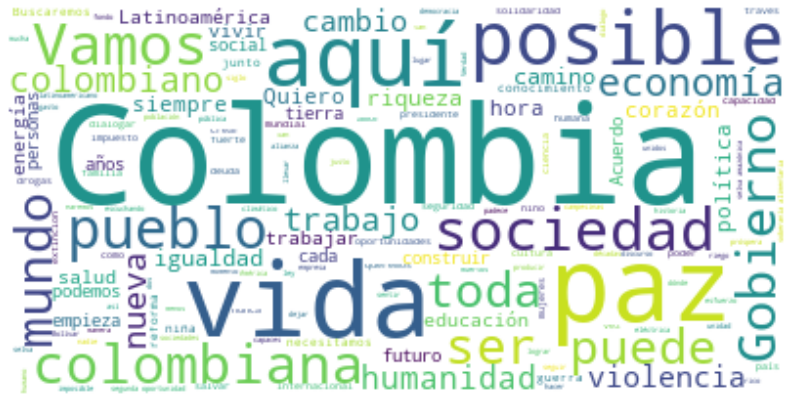

In [59]:
#re-generate the wordCloud
speachPetro.generate(mensaje)

#display the cloud properly
fig= plt.figure()
#set width
fig.set_figwidth(14)
#set height
fig.set_figheight(18)

plt.imshow(speachPetro, interpolation='bilinear')
plt.axis('off')
plt.show()

# Retrieving the image for the mask

In [60]:
mask = np.array(Image.open('/content/croquisColombia.png'))
mask[mask == 1] =25
print('Image downloaded') #just to check

Image downloaded


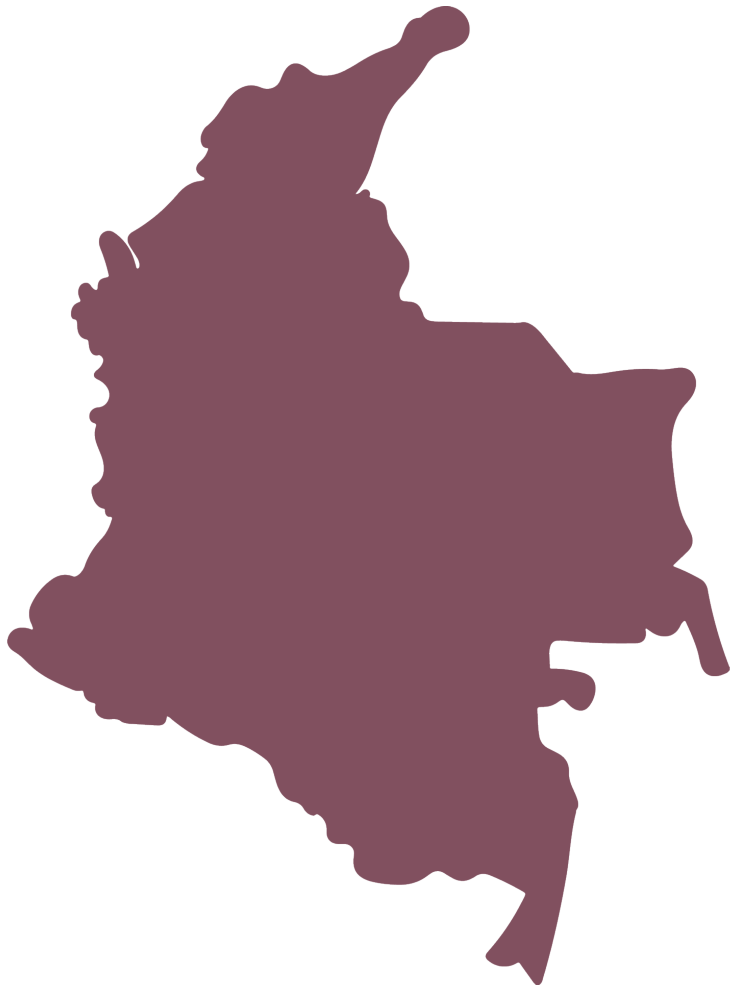

In [61]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

#Shaping the word cloud according to the mask 
this is straightforward using word_cloud package. For simplicity, we will continue using the first 2000 words from the text.

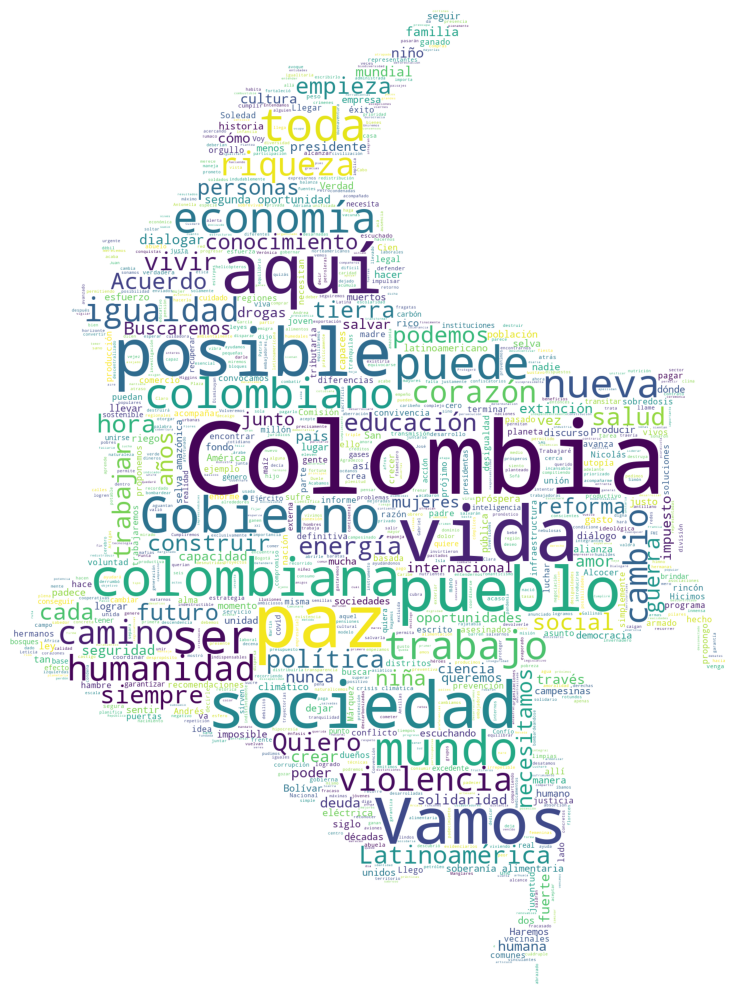

In [62]:
speachPetro = WordCloud(background_color='white',
                        max_words=2000,
                        stopwords=stop_words,
                        mask = mask,
                        )
speachPetro.generate(mensaje)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(speachPetro)
plt.axis('off')
plt.show()

In [66]:
filtered_words = [word for word in mensaje.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []

for letter, count in counted_words.most_common(11):
  words.append(letter)
  counts.append(count)


#Prepare the data for ploting and count the words

<BarContainer object of 11 artists>

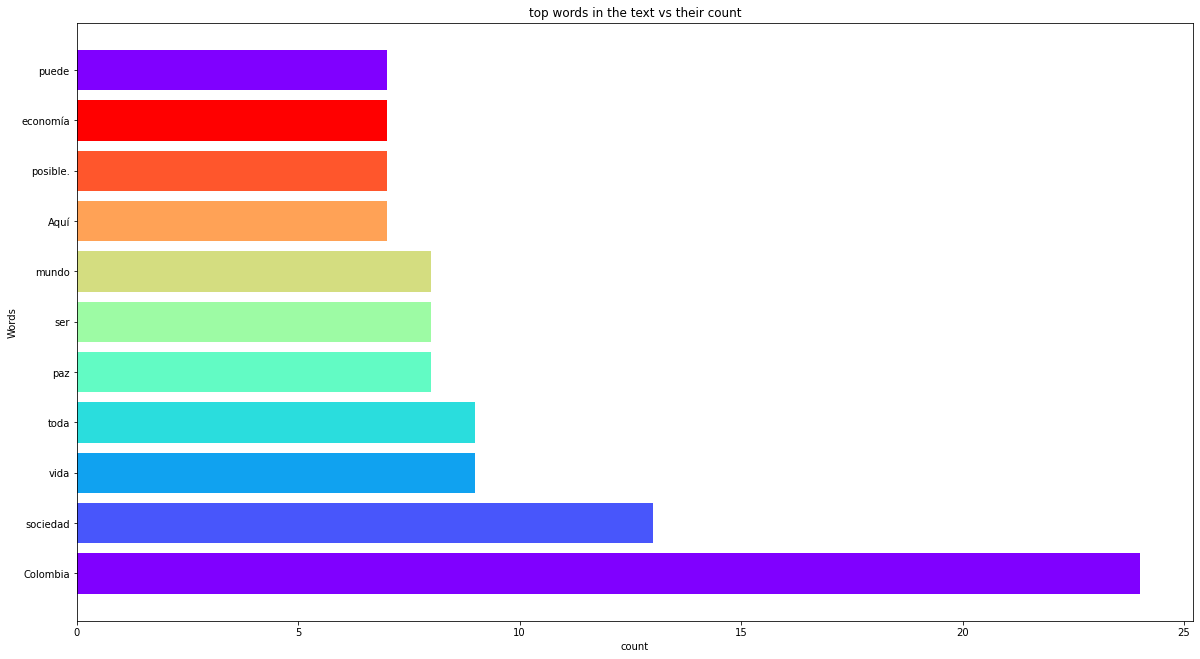

In [67]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] =20, 11

plt.title('top words in the text vs their count')
plt.xlabel('count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

#RESULTS

the 10 top words:
1. Colombia
2. Sociedad
3. Vida
4. Toda
5. Paz
6. ser
7. Mundo
8. Aqui
9. Posible
10. Economia

* PD: There was an issue with the word, 'Colombia.' it is possible to clean the text and to edit all the dots. for this time does not affect the results. 